## Установка необходимых модулей

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sympy.printing.pretty.pretty_symbology import line_width

plt.figure(dpi=200)
plt.rcParams['text.usetex'] = True
np.set_printoptions(suppress=True, precision=3)

<Figure size 1280x960 with 0 Axes>

## Исходные данные

In [3]:
Tp = 0.0014
Tk = 0.23
Kp1 = 4
Td = 2
Kd1 = 1

## Характеристическое уравнение САР $$ a(p) = a_{0}p^n + a_{1}p^{n-1} + \ldots + a_{n-1}p + a_{n} $$

### В текущей работе будет рассмотрена система 3-го порядка $$ a(p) = A_{3}p^3 + A_{2}p^2 + A_{1}p + A_{0} $$

### Параметры хар.уравнения

##### $$A_{3} = Tp^2Td $$ 
##### $$ A_{2} = Tp^2 + TkTd $$
##### $$ A_{1} = Tk+Td $$ 
##### $$ A_{0} = 1 + Kp1Kd1 $$


In [4]:
A3 = Tp * Td
A2 = Tp + Tk * Td
A1 = Tk + Td
A0 = 1 + Kp1 * Kd1

koef = dict(zip(['A3', 'A2', 'A1', 'A0'], [A3, A2, A1, A0]))
print(*koef.items(), sep='\n')

('A3', 0.0028)
('A2', 0.46140000000000003)
('A1', 2.23)
('A0', 5)


### Последовательность работы
1. Критерий устойчивости Рауcа-Гурвица
2. Оценка устойчивости и характера переходного процесса по диаграмме Вышнеградского
3. Критерий устойчивости Михайлова
4. Следствие из критерия устойчивости Михайова
5. Критерий устойчивости Найквиста
6. Синтез САР по устойчивости по методу D-разбиения

## 1. Критерий устойчивости **Рауcа-Гурвица**
Для устойчивости САР необходимо, чтобы все коэффициенты были положительны и достаточно, чтобы были положительны n определителей Гурвица

### Необходимое условие 
#### $$ A_{3} > 0, A_{2} > 0, A_{1} > 0, A_{0} > 0 $$

### Матрица Гурвица
#### Пусть дан полином с вещественными коэффициентами: $$ a(p) = a_{0}p^n + a_{1}p^{n-1} + \ldots + a_{n-1}p + a_{n}$$

#### Тогда квадратичная матрица n * n

$$ 
    H = \begin{pmatrix}
        a_{1}  &a_{3}  &a_{5}  &\dots  &\dots  &\dots  &0      &0      &0\\
        a_{0}  &a_{2}  &a_{4}  &       &       &       &\vdots  &\vdots  &\vdots \\
        0      &a_{1}  &a_{3}  &       &       &       &\vdots  &\vdots  &\vdots \\
        0      &a_{0}  &a_{2}  &\ddots &       &       &0       &\vdots  &\vdots \\
        \vdots &0      &a_{1}  &       &\ddots &       &a_{n}   &0       &\vdots \\
        \vdots &0      &a_{0}  &       &       &\ddots &a_{n-1} &0       &\vdots \\
        \vdots &\vdots &0      &       &       &       &a_{n-2} &a_{n}   &0      \\
        \vdots &\vdots &\vdots &       &       &       &a_{n-3} &a_{n-1} &0      \\
        0      &0      &0      &\dots  &\dots  &\dots  &a_{n-4} &a_{n-2} &a_{n}  \\
        \end{pmatrix}
$$

#### Называется **матрицей Гурвица**, соответствующей полиному a(p)

#### Миноры

$$
    \Delta_{1}(p) = \begin{vmatrix}
                    a_{1}
                    \end{vmatrix}
$$

$$    
   \Delta_{2}(p) = \begin{vmatrix}
                    a_{1} &a_{3} \\
                    a_{0} &a_{2}
                    \end{vmatrix}
$$

$$   
   \Delta_{3}(p) = \begin{vmatrix}
                    a_{1} &a_{3} &a_{5}\\
                    a_{0} &a_{2} &a_{4}\\
                    0     &a_{1} &a_{3}
                    \end{vmatrix}
$$

#### вида $$ {\textstyle \Delta _{k}(p)} $$ называются **определителями Гурвица**. Для устойчивости САР достаточно, чтобы первые n определителей Гурвица были положительны
 


In [5]:
# Матрица гурвица для САР 3-го порядка

result = map(lambda x: x > 0, koef.values())
for info, res in zip(koef.items(), result):
    print(f"{info[0]}({np.round(info[1], 3) :5}) > 0 => {res}")

P1 = np.all(result)
print(f"Необходимое условие -> {P1} \n\n")


H = np.array([[A2, A0, 0], 
              [A3, A1, 0], 
              [0, A2, A0]])

minors = [H[:i, :i] for i in range(1, 4)]

result = map(lambda x: np.linalg.det(x), minors)
for matrix, res in zip(minors, result):
    print(f"{matrix}) > 0 => {res : 4.2f}")
  
print(f'Достаточное условие : {np.all(result)} \n')
P1 *= np.all(result)

print(f"САР {['не ', ''][bool(P1)]}устойчива")

A3(0.003) > 0 => True
A2(0.461) > 0 => True
A1( 2.23) > 0 => True
A0(    5) > 0 => True
Необходимое условие -> True 


[[0.461]]) > 0 =>  0.46
[[0.461 5.   ]
 [0.003 2.23 ]]) > 0 =>  1.01
[[0.461 5.    0.   ]
 [0.003 2.23  0.   ]
 [0.    0.461 5.   ]]) > 0 =>  5.07
Достаточное условие : True 

САР устойчива


## 2. Оценка устойчивости и характера переходного процесса по диаграмме Вышнеградского

### Для использования данного метода преобразуем выражение:
### $$ A_{3}\frac{d^{3}\varphi}{dt^{3}} + A_{2}\frac{d^{2}\varphi}{dt^{2}} + A_{1}\frac{d\varphi}{dt} + A_{0}\varphi = 0 $$

### 1. Делим все слагаемые на A3:
### $$ \frac{d^{3}\varphi}{dt^{3}} + \frac{A_{2}}{A_{3}}\frac{d^{2}\varphi}{dt^{2}} + \frac{A_{1}}{A_{3}}\frac{d\varphi}{dt} + \frac{A_{0}}{A_{3}}\varphi = 0 $$

### 2. Вводим новую переменную: 
### $$ t = q\tau $$ где t - время, q - масштабный коэффициент, tau - время
### $$ \frac{d^{3}\varphi}{q^{3}d\tau^{3}} + \frac{A_{2}}{A_{3}}\frac{d^{2}\varphi}{q^{2}d\tau^{2}} + \frac{A_{1}}{A_{3}}\frac{d\varphi}{qdt} + \frac{A_{0}}{A_{3}}\varphi = 0 $$

### 3. Умножаем на q^3: 
### $$ \frac{d^{3}\varphi}{d\tau^{3}} + q\frac{A_{2}}{A_{3}}\frac{d^{2}\varphi}{d\tau^{2}} + q^{2}\frac{A_{1}}{A_{3}}\frac{d\varphi}{dt} + q^{3}\frac{A_{0}}{A_{3}}\varphi = 0 $$
#### При этом подбираем масштабный коэффициент q так, чтобы выполнялось равенство $$ \int{ \frac{A_{0}}{A_{3}}q^{3} } = 1 \Rightarrow q = \sqrt[3]{\frac{A_{3}}{A_{0}}} $$


### 4. Уравнение в нормированном виде: 
### $$ \frac{d^{3}\varphi}{d\tau^{3}} + 
        \sqrt[3]{\frac{A_{3}}{A_{0}}}\frac{A_{2}}{A_{3}}\frac{d^{2}\varphi}{d\tau^{2}} + 
        \sqrt[3]{\frac{A_{3}^{2}}{A_{0}^{2}}}\frac{A_{1}}{A_{3}}\frac{d\varphi}{dt} + 
        \varphi = 0 $$
        
### Критерии подобия переходного процесса: $$ \chi = \frac{A_{2}}{\sqrt[3]{A_{3}^2A_{0}}}, \xi = \frac{A_{1}}{\sqrt[3]{A_{3}A_{0}^2}} $$

### Итоговое уравнение $$ p^{3} + \chi p^{2} + \xi p + 1 = 0 $$

### Достаточное условие $$ \Delta_{2} = \begin{vmatrix}
                                         a1 &a3 \\
                                         a0 &a2
                                         \end{vmatrix} =
                                         \begin{vmatrix}
                                         \chi &1 \\
                                         1    &\xi
                                         \end{vmatrix} $$

#### $$ \text{САР устойчива: } \Delta_{2} > 0 (\chi\xi > 1) $$
#### $$ \text{САР на границе устойчивости: } \Delta_{2} = 0 $$
#### $$ \text{САР не устойчива: } \Delta_{2} < 0 $$

                        

In [6]:
# Определение критериев подобия переходного процесса
xi_p = A2 / ((A3 ** 2 * A0) ** (1/3))
ksi_p = A1 / ((A3 * A0 ** 2) ** (1/3))

print(f"{xi_p = }")
print(f"{ksi_p = }")

P2 = xi_p * ksi_p > 1
print(f"Достаточное условие - {P2}")

xi_p = 13.582578838083341
ksi_p = 5.410933332141767
Достаточное условие - True


In [7]:
xi = np.arange(0.02, 50, 0.1)
ksi = 1/xi

delta = 0.025
x = np.arange(-50, 50, delta)
y = np.arange(-50, 50, delta)

p, q = np.meshgrid(x, y)
f = lambda x, y: 4*(x**3 + y**3)-x**2*y**2-18*x*y+27
z=f(p,q)

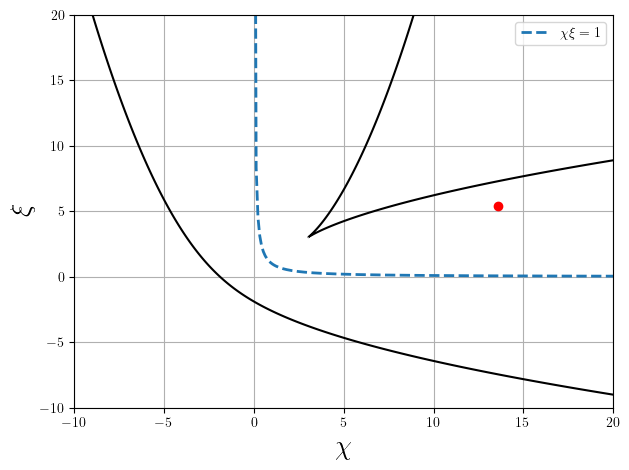

In [8]:
fig, ax = plt.subplots()
plt.xlim(-10, 20)
plt.ylim(-10, 20)
plt.grid()

ax.set_xlabel(r'$\chi$', fontsize=20)
ax.set_ylabel(r'$\xi$', fontsize=20)
ax.contour(p, q, z , [0], colors=["k"])
ax.plot(xi, ksi, '--', label=r'$\chi\xi=1$', linewidth=2, )
ax.plot(xi_p, ksi_p, 'ro')
ax.legend()
fig.tight_layout()
fig.savefig('images/chapter2.png')


## 3. Критерий Михайлова
### Чтобы САР (замкнутая или разомкнутая) была устойчивой, необходимо и достаточно, чтобы годограф $a(i\omega)$ при изменении $\omega$ от 0 до $ \infty $ переходил поочередно из квадранта в квадрант против часовой стрелки, совершив при этом поворот на угол $\frac{\pi}{2}\cdot$ n, где n- степень полинома $a(i\omega)$

### Для этого в наше уравнение подставим $ p = i\omega$
### $$ a(p) = A_{3}p^{3} + A_{2}p^{2} + A_{1}p + A_{0} $$
### $$ a(i\omega) = -iA_{3}\omega^{3} - A_{2}\omega^{2} + iA_{1}\omega + A_{0} = 0 $$

### Представим уравнение в виде:
### $$ a(i\omega) = X(\omega) + iY(\omega) $$

### Тогда получим:
### $$ \begin{cases} 
        X(\omega) = -A_{2}\omega^{2} + A_{0} \\
        Y(\omega) = -A_{3}\omega^{3} + A_{1}\omega
        \end{cases}
    $$

In [9]:
# Получение координат для omega = [0, 100)
omega = np.arange(0, 100, 0.1)
X = -A2*omega**2 + A0
Y = -A3*omega**3 + A1 * omega

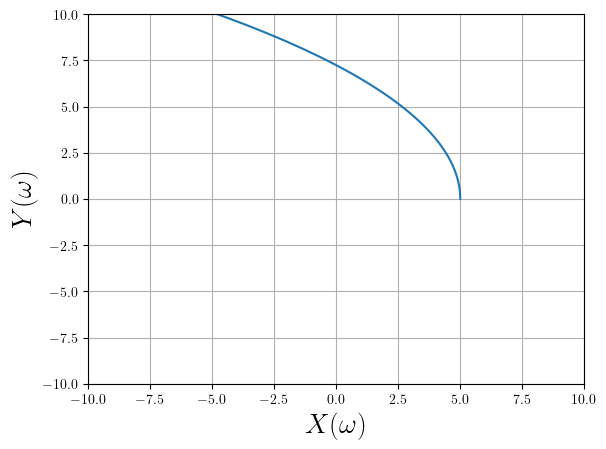

In [10]:
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.plot(X, Y)
plt.grid()
plt.xlabel(r'$X(\omega)$', fontsize=20)
plt.ylabel(r'$Y(\omega)$', fontsize=20)
plt.savefig('images/chapter31.png')

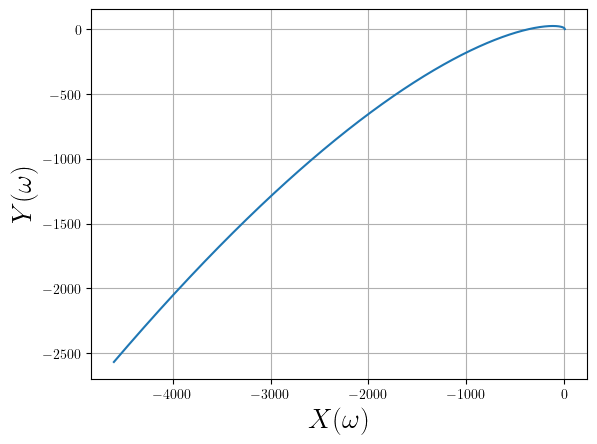

In [11]:
plt.plot(X, Y)
plt.grid()
plt.xlabel(r'$X(\omega)$', fontsize=20)
plt.ylabel(r'$Y(\omega)$', fontsize=20)
plt.savefig('images/chapter32.png')

## 4. Следствие из критерия Михайлова
### Для систем высокого порядка построение кривой Михайлова становится очень трудоёмким. Для устойчивой САР необходимо и достаточно, чтобы при изменении $ \omega = 0\dots\infty $ корни вещественной $ X(\omega) $ и мнимой $ Y(\omega) $ частей вектора $ a(i\omega) $ последовательно чередовались

### Следовательно, должно выполнятся соотношение 
### $$
    \omega_{x1} < \omega_{y1} < \omega_{x2} < \omega_{y2} < \dots
$$

### Для САР 3-го порядка: 
### $$ a(i\omega) = X(\omega) + iY(\omega)$$

### $$ \begin{cases} 
        X(\omega) = -A_{2}\omega^{2} + A_{0} \\
        Y(\omega) = -A_{3}\omega^{3} + A_{1}\omega
        \end{cases}
    $$
   
### Тогда получим:
### $ \omega_{x1} = 0 $, $ \omega_{y1} = \sqrt[2]{\frac{A_{0}}{A_{2}}} $, $ \omega_{x2} = \sqrt[2]{\frac{A_{1}}{A_{3}}} $



In [12]:
# Определим ключевые значения
ox1 = 0
oy1 = (A0/A2) ** 0.5
ox2 = (A1/A3) ** 0.5
print(f"{ox1 = }, {oy1 = :5.4}, {ox2 = :5.4}")

ox1 = 0, oy1 = 3.292, ox2 = 28.22


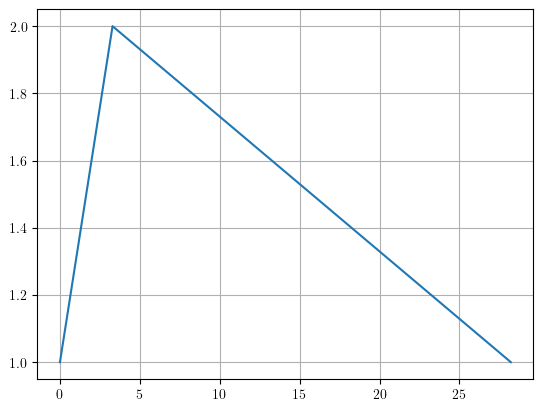

In [13]:
# Изобразим корни на координатной плоскости
p1 = (ox1, 1)
p2 = (oy1, 2)
p3 = (ox2, 1)
points = zip(p1, p2, p3)
plt.plot(*points)
plt.grid()
plt.savefig('images/chapter4.png')

## 5. Критерий устойчивости Найквиста
### Позволяет оценить устойчивость замкнутой САР по виду АФЧХ соответствующей ей разомкнутой САР.
### Для устойчивости замкнутой САР необходимо и достаточно, чтобы при $ \omega=0\ldots\infty $ $ \psi_1 $ вектора $ a_{1}(i\omega) $ составлял $ \psi_{1} = l_{p} * \pi $ в положительном направлении(против часовой стрелки), где $ l_{p} $ число корней зарактеристического уравнения разомкнутой САР расположенной в правой полуплоскости на плоскости корней

### $$
    W_{замкн}(p) = \frac{K_{р1}K_{д1}}{\underbrace{A_{3}p^{3} + A_{2}p^{2} + A_{1}p + A_{0}}_{\text{Хар.многочлен замкнутой САР}}}
$$

### $$
    W_{разомк}(p) = \frac{K_{р1}K_{д1}}{\underbrace{A_{3}p^{3} + A_{2}p^{2} + A_{1}p + 1}_{\text{Хар.многочлен разомкнутой САР}}}
$$

### Подставим в уравнение разомкнутой САР $ p = i\omega $, домножив на комплексно-сопряжённое
### $$
    W_{разомк}(i\omega) = \frac{K_{р1}K_{д1}}{-A_{3}\omega^{3} - A_{2}\omega^{2} + iA_{1}\omega + 1}*
    \frac{1-A_{2}\omega^{2}-i(A_{1}\omega-A_{3}\omega^{3})}{1-A_{2}\omega^{2}-i(A_{1}\omega-A_{3}\omega^{3})}
$$

### Получим
### $$
    W_{разомк}(i\omega) = \frac{K_{р1}K_{д1}*(1-A_{2}\omega^{2})} {\underbrace{(1-A_{2}\omega^{2})^{2}+(A_{1}\omega-A_{3}\omega^{3})^{2}}_{Uразомк(\omega)}} + 
    i\frac{-K_{р1}K_{д1}*(A_{1}\omega-A_{3}\omega^{3})} {\underbrace{(1-A_{2}\omega^{2})^{2}+(A_{1}\omega-A_{3}\omega^{3})^{2}}_{Vразомк(\omega)}}
$$

In [14]:
# Получение координат для omega = [0, 100)
omega = np.arange(0, 100, 0.01)
U = (Kp1*Kd1 * (1-A2*omega**2)) / ((1-A2*omega**2) ** 2 + (A1*omega-A3*omega**3) ** 2)
V = (-Kp1*Kd1 * (A1*omega-A3*omega**3)) / ((1-A2*omega**2) ** 2 + (A1*omega-A3*omega**3) ** 2)

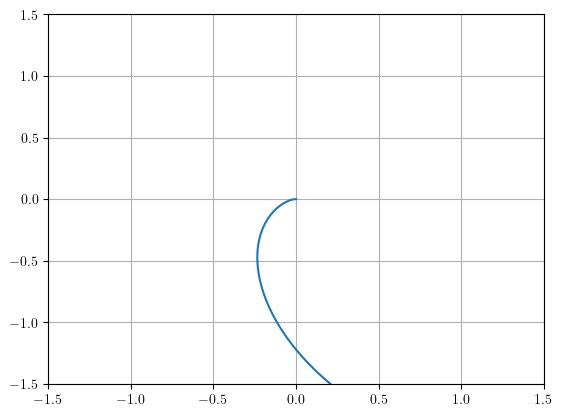

In [15]:
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.plot(U, V)
plt.grid()
plt.savefig('images/chapter51.png')

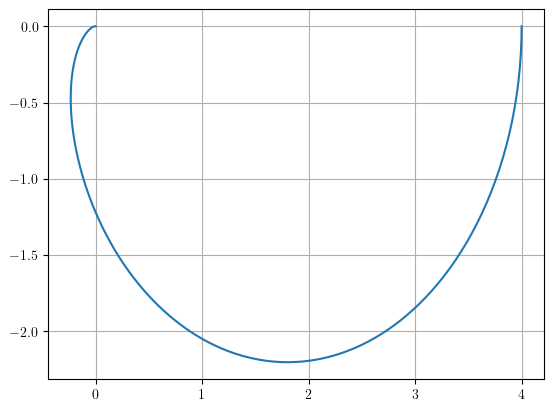

In [16]:
plt.plot(U, V)
plt.grid()
plt.savefig('images/chapter52.png')

## 6. Синтез САР по устойчивости по методу **D-разбиения**(1 параметр)
### Данный метод отностистя к методам синтеза, которые нужны для опредления структуры или параметров САР из требований к системе

### Примем $ K_{p1} = \lambda$ как неизвестный параметр, необходимо найти диапазон значений, который обеспечит устойчивую работу нашей системы
### Запишем развернутое характеристической уравнение
### $$
    \underbrace{T_{p}^2T_{d}}_{A_{3}}p^{3} + \underbrace{(T_{p}^{2} + T_{k}T_{d})}_{A_{2}}p^{2} + \underbrace{(T_{k}T_{d})}_{A_{1}}p + 1 + K_{p1}K_{d1} = 0
$$
### Подставив $ \lambda $ вместо $ K_{p1} $ получим 
### $$
    T_{p}^2T_{d}p^{3} + (T_{p}^{2} + T_{k}T_{d})p^{2} + (T_{k}T_{d})p + 1 + \lambda K_{d1} = 0
$$
### Выразим $ \lambda(p) $
### $$
    \lambda(p) = \frac{- A_{3}p^{3} - A_{2}p^{2} - A_{1}p - 1}{K_{d1}}
$$

### Подставим $ p = i\omega $ и преобразуем к виду $ \lambda(i\omega) = X(\omega) + iY(\omega) $
### $$
    \lambda(i\omega) = \frac{iA_{3}\omega^{3} + A_{2}\omega^{2} - iA_{1}p - 1}{K_{d1}}
$$

### $$ \begin{cases} 
        X(\omega) = \frac{A_{2}\omega^{2} - 1}{K_{d1}} \\
        Y(\omega) = \frac{A_{3}\omega^{3} - A_{1}\omega}{K_{d1}}
        \end{cases}
    $$


In [17]:
# Получение координат для omega = [-100, 100)
omega = np.arange(-35, 35, 0.01)
X = (A2*omega**2 - 1) / (Kd1)
Y = (A3*omega**3 - A1*omega) / (Kd1)
# Найдем точки, где график пересекает вещественную ось
omega1 = 0
omega2 = (A1/A3)**0.5
X1 = (A2*omega1**2 - 1) / (Kd1)
X2 = (A2*omega2**2 - 1) / (Kd1)

print(f"Искомый параметр лежит в пределах {X1} < Kp1 < {X2}")

Искомый параметр лежит в пределах -1.0 < Kp1 < 366.4721428571429


### Правило штриховки на плоскости 1-го неизвестного параметра. При движении от точки $ \omega = -\infty $ к $ \omega = +\infty $ штриховка слева по ходу движения. Область вся заштрихованная изнутри является областью устойчивости. Поскольку искомый параметр является вещественным числом, то из полученной области выделяются только точки, лежащие на вещественной оси

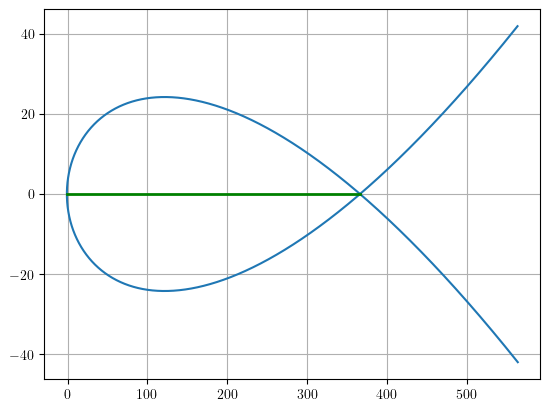

In [19]:
plt.plot(X, Y)
plt.plot([X1, X2], [0, 0], 'g', linewidth=2)
plt.grid()
plt.savefig('images/chapter6.png')